# Alex Richkum

## What Trends are Apparent in the Ratings and Reviews of the Play Store

My research question is reguarding how the trends found in the ratings and reviews posted in the Play Store dataset can be used to predict future consumer purchasing prefereneces.

## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/android-games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [7]:
df['rank'] = df['rank'].astype('str')

df['total ratings'] = df['total ratings'].astype('category')
df['5 star ratings'] = df['5 star ratings'].astype('category')
df['4 star ratings'] = df['4 star ratings'].astype('category')
df['3 star ratings'] = df['3 star ratings'].astype('category')
df['2 star ratings'] = df['2 star ratings'].astype(str).str.strip().astype('category')
df['1 star ratings'] = df['1 star ratings'].astype('category')
df['growth (30 days)'] = df['growth (30 days)'].astype('category')
df['growth (60 days)'] = df['growth (60 days)'].astype('category')
df['category'] = df['category'].astype('category')

df['rank']

0         1
1         2
2         3
3         4
4         5
       ... 
1725     96
1726     97
1727     98
1728     99
1729    100
Name: rank, Length: 1730, dtype: object

In [19]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [12]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

## Task 2

In [13]:
# leed data
df = pd.read_csv('../data/raw/android-games.csv')

# keep colums we want
df = df[['rank', 'title', 'installs', 'total ratings', 'growth (30 days)', 'growth (60 days)', 'category', '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings']]

#drop na values
df = df.dropna(how="any")

# sort by installs and rest index
df = df.sort_values("total ratings").reset_index(drop=True)
df.head()

,rank,title,installs,total ratings,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,39,バンドリ！ ガールズバンドパーティ！,1.0 M,127314,0.4,1.0,GAME MUSIC,90009,16965,7215,3373,9750
1,99,원피스 트레저 크루즈,1.0 M,281148,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",1.0 M,51002,1.0,1.7,GAME EDUCATIONAL,38219,6460,2431,982,2907
3,74,Popscene (Music Industry Sim),1.0 M,53142,0.5,1.1,GAME MUSIC,27811,6397,5002,3188,10741
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,1.0 M,367694,0.1,0.1,GAME CASINO,278174,55844,18491,4517,10665


## Task 3

In [3]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv('../data/raw/android-games.csv')
          .dropna(how="any")
          .sort_values("installs")
          .reset_index(drop=True)
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
      )

    # Make sure to return the latest dataframe

    return df2 

load_and_process('../data/raw/android-games.csv')

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,39,バンドリ！ ガールズバンドパーティ！,127314,1.0 M,4,0.4,1.0,0.0,GAME MUSIC,90009,16965,7215,3373,9750,False
1,99,원피스 트레저 크루즈,281148,1.0 M,4,0.0,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262,False
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",51002,1.0 M,4,1.0,1.7,0.0,GAME EDUCATIONAL,38219,6460,2431,982,2907,False
3,74,Popscene (Music Industry Sim),53142,1.0 M,3,0.5,1.1,0.0,GAME MUSIC,27811,6397,5002,3188,10741,False
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,367694,1.0 M,4,0.1,0.1,0.0,GAME CASINO,278174,55844,18491,4517,10665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,77,SuperStar YG,48198,500.0 k,4,3.9,10.7,0.0,GAME MUSIC,37036,5112,2158,1334,2556,False
1726,70,SHOW BY ROCK!![爽快音ゲー ショウバイロック］,55357,500.0 k,4,0.0,0.0,0.0,GAME MUSIC,30635,15762,5493,1738,1728,False
1727,87,Slots on Tour Casino - Vegas Slot Machine Game...,99082,500.0 k,4,0.1,0.2,0.0,GAME CASINO,78458,14511,3405,749,1957,False
1728,85,90's Quiz Game,47912,500.0 k,4,0.0,0.0,0.0,GAME TRIVIA,40057,4661,2300,347,545,False


In [1]:
import project_functions1 
df = project_functions1.load_and_process('../data/raw/android-games.csv')
df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,39,バンドリ！ ガールズバンドパーティ！,127314,1.0 M,4,0.4,1.0,0.0,GAME MUSIC,90009,16965,7215,3373,9750,False
1,99,원피스 트레저 크루즈,281148,1.0 M,4,0.0,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262,False
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",51002,1.0 M,4,1.0,1.7,0.0,GAME EDUCATIONAL,38219,6460,2431,982,2907,False
3,74,Popscene (Music Industry Sim),53142,1.0 M,3,0.5,1.1,0.0,GAME MUSIC,27811,6397,5002,3188,10741,False
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,367694,1.0 M,4,0.1,0.1,0.0,GAME CASINO,278174,55844,18491,4517,10665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,77,SuperStar YG,48198,500.0 k,4,3.9,10.7,0.0,GAME MUSIC,37036,5112,2158,1334,2556,False
1726,70,SHOW BY ROCK!![爽快音ゲー ショウバイロック］,55357,500.0 k,4,0.0,0.0,0.0,GAME MUSIC,30635,15762,5493,1738,1728,False
1727,87,Slots on Tour Casino - Vegas Slot Machine Game...,99082,500.0 k,4,0.1,0.2,0.0,GAME CASINO,78458,14511,3405,749,1957,False
1728,85,90's Quiz Game,47912,500.0 k,4,0.0,0.0,0.0,GAME TRIVIA,40057,4661,2300,347,545,False


## Task 4

this shows the average ratings for each game type
 


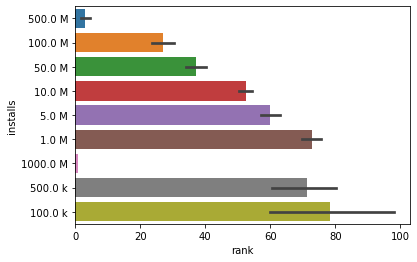

In [26]:
df = pd.read_csv('../data/raw/android-games.csv')

print('this shows the relations between the game rankings and installations')
print(' ')

# class v / s for barplot
sns.barplot(x = 'rank', y = 'installs', data = df)

# Show the plot
plt.show()


## Relation to research question

This data shows that the ratings of games do not always predict how sales/downloads of game will go.


Milestone 5

In [2]:
df = pd.read_csv('../data/raw/android-games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [3]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

In [4]:
df.shape

(1730, 15)

In [5]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,50.386705,1064331.919653,3.908092,321.735896,122.554971,0.010942,762231.471676,116436.581503,57063.069364,27103.356647,101494.952601
std,28.936742,3429249.519240,0.290973,6018.914507,2253.891703,0.214987,2538658.074096,302163.057101,149531.410429,81545.417820,408374.532963
min,1.000000,32993.000000,2.000000,0.000000,0.000000,0.000000,13975.000000,2451.000000,718.000000,266.000000,545.000000
25%,25.000000,175999.250000,4.000000,0.100000,0.200000,0.000000,127730.000000,20643.000000,9652.500000,4262.250000,12812.000000
50%,50.000000,428606.500000,4.000000,0.500000,1.000000,0.000000,296434.000000,50980.500000,25078.000000,10675.500000,33686.000000
75%,75.000000,883797.000000,4.000000,1.700000,3.300000,0.000000,619835.750000,101814.000000,52295.000000,23228.750000,80157.250000
max,100.000000,86273129.000000,4.000000,227105.700000,69441.400000,7.490000,63546766.000000,5404966.000000,3158756.000000,2122183.000000,12495915.000000


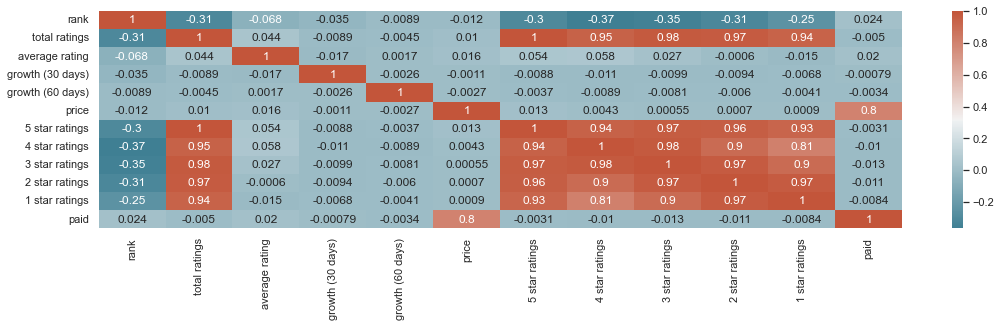

In [34]:
img1 = df.corr()
sns.heatmap(img1, xticklabels=img1.columns, yticklabels=img1.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.set(rc = {'figure.figsize':(18,4)}, style = 'white')

This heatmap shows the correlation between several categories in the dataset. A value of 1 means the correlation between two categories is high, while a value 0 means there is not correlation at all. Additionally a correlation of -1 will suggest that as one category rises, the other falls.

After reviewing the data displayed by this image we can see that its suggests a rank of a game does not have much impact on factors on the price which leads me to believe that the price has very little effect on the quality of a game, or the enjoyment a person has with said game. Additionally another interesting stat from this visulization is how all of the different level of star ratings appear increase at similar rates. This makes me believe that for example, as the amount of 5 star ratings increase, the level of 3 star ratings increase at the same time. This will also happen with the ratings category when compared with each other

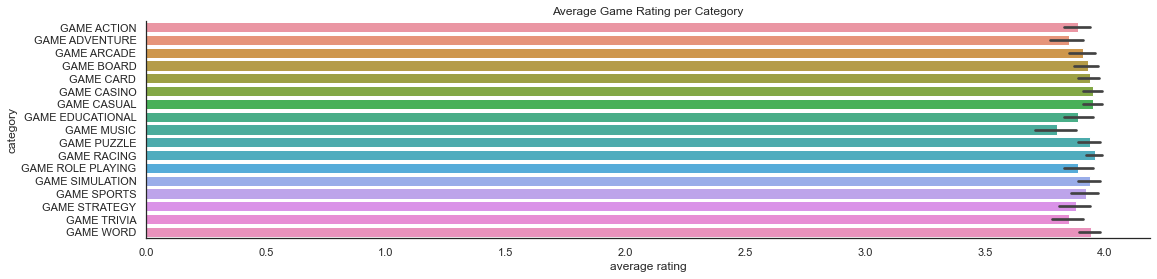

In [38]:
img2 = sns.barplot(data = df, x='average rating', y='category')
img2.set(title='Average Game Rating per Category')
sns.despine()

This barplot displays how each game category is rated in comparision to all other categories.

From this barplot we can conclude that of all game categories racing games appear to be the highest rated on average, and educational games appear to be the lowest rated on average. However, it is important to note that there does not appear to be much of a difference between the highest rated and lowest rated game. This suggests that game category likely is not what determines the rating of a game in most cases.

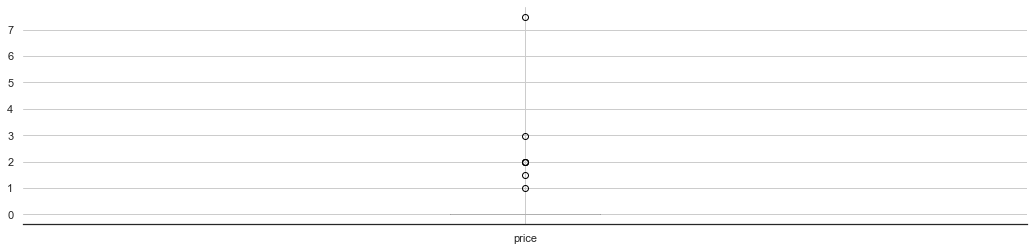

In [37]:
img3 = df.boxplot('price')
sns.despine(left=True)

This is a boxplot of the prices for all listed games in the dataset.

What I find most interesting about this plot is how there are on 4 rows out of over 1700 that are paid games on the google play store. These games range from 1 dollar to around 7.5 dollars.

## Task 2

### Load Data

In [13]:
df = pd.read_csv('../data/raw/android-games.csv')

### Clean Data

In [14]:
df2 = df.copy().drop(['growth (30 days)','growth (60 days)','paid'], axis=1)

df2 = df2.dropna(axis=0)

df2.head()

,rank,title,total ratings,installs,average rating,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998
3,4,Brawl Stars,17971552,100.0 M,4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340


### Process Data

In [39]:
df2['Ratings Greater than 3 Stars'] = df2['5 star ratings'] + df2['4 star ratings']
df2.head()

,rank,title,total ratings,installs,average rating,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,Ratings Greater than 3 Stars
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,68496273
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,30504231
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,20590082
3,4,Brawl Stars,17971552,100.0 M,4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,14571560
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,11951482


### Wrangle Data

In [120]:
df2 = df2.sort_values(by=("5 star ratings"), ascending=False)
df2

,rank,title,total ratings,installs,average rating,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,Ratings Greater than 3 Stars
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,68496273
1426,1,Clash of Clans,55766763,500.0 M,4,0.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,48751094
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,30504231
200,1,Subway Surfers,35665901,1000.0 M,4,0.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,30505172
626,1,Candy Crush Saga,31367945,1000.0 M,4,0.0,GAME CASUAL,23837448,4176798,1534041,486005,1333650,28014246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,97,Piano Detector,34434,1.0 M,4,0.0,GAME MUSIC,23468,3894,2256,998,3814,27362
903,78,Opsu!(Beatmap player for Android),48107,1.0 M,3,0.0,GAME MUSIC,22453,6626,5140,2852,11033,29079
909,84,Mini Piano,45003,5.0 M,3,0.0,GAME MUSIC,22326,4329,4399,2799,11148,26655
925,100,Berpacu Dalam Melody Indonesia,32993,1.0 M,4,0.0,GAME MUSIC,19715,5998,4988,849,1439,25713


## Task 3

In [121]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    dfg1 = (
          pd.read_csv('../data/raw/android-games.csv')
          .dropna(axis=0)
          .reset_index(drop=True)
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    dfg2 = (
          dfg1
          .drop(['growth (30 days)','growth (60 days)','paid'], axis=1)
          .sort_values('5 star ratings', ascending=False)
      )

    return dfg2 

load_and_process('../data/raw/android-games.csv')

,rank,title,total ratings,installs,average rating,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1426,1,Clash of Clans,55766763,500.0 M,4,0.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492
200,1,Subway Surfers,35665901,1000.0 M,4,0.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142
626,1,Candy Crush Saga,31367945,1000.0 M,4,0.0,GAME CASUAL,23837448,4176798,1534041,486005,1333650
...,...,...,...,...,...,...,...,...,...,...,...,...
922,97,Piano Detector,34434,1.0 M,4,0.0,GAME MUSIC,23468,3894,2256,998,3814
903,78,Opsu!(Beatmap player for Android),48107,1.0 M,3,0.0,GAME MUSIC,22453,6626,5140,2852,11033
909,84,Mini Piano,45003,5.0 M,3,0.0,GAME MUSIC,22326,4329,4399,2799,11148
925,100,Berpacu Dalam Melody Indonesia,32993,1.0 M,4,0.0,GAME MUSIC,19715,5998,4988,849,1439


In [122]:
import project_functions1
df2 = project_functions1.load_and_process('../data/raw/android-games.csv')
df2

,rank,title,total ratings,installs,average rating,price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915
1426,1,Clash of Clans,55766763,500.0 M,4,0.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492
200,1,Subway Surfers,35665901,1000.0 M,4,0.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142
626,1,Candy Crush Saga,31367945,1000.0 M,4,0.0,GAME CASUAL,23837448,4176798,1534041,486005,1333650
...,...,...,...,...,...,...,...,...,...,...,...,...
922,97,Piano Detector,34434,1.0 M,4,0.0,GAME MUSIC,23468,3894,2256,998,3814
903,78,Opsu!(Beatmap player for Android),48107,1.0 M,3,0.0,GAME MUSIC,22453,6626,5140,2852,11033
909,84,Mini Piano,45003,5.0 M,3,0.0,GAME MUSIC,22326,4329,4399,2799,11148
925,100,Berpacu Dalam Melody Indonesia,32993,1.0 M,4,0.0,GAME MUSIC,19715,5998,4988,849,1439


## Task 4

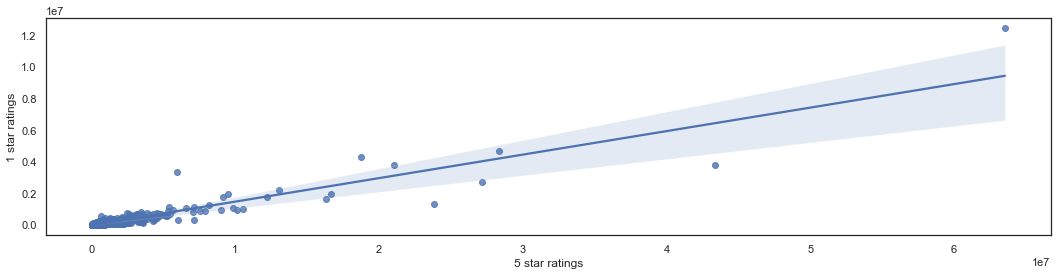

In [137]:
Figure1 = sns.regplot(x='5 star ratings', y='1 star ratings', data = df2)

Figure 1: The scatterplot displays the correlation between 5 star ratings and 1 star ratings from games in the Google Play Store. What I found to be interesting frot this figure was how there is a positive correlation between 5 star and 1 star ratings. This is likely due to the amount of ratings increasing overall, however, 5 star ratings seem to appear at a greater rate.

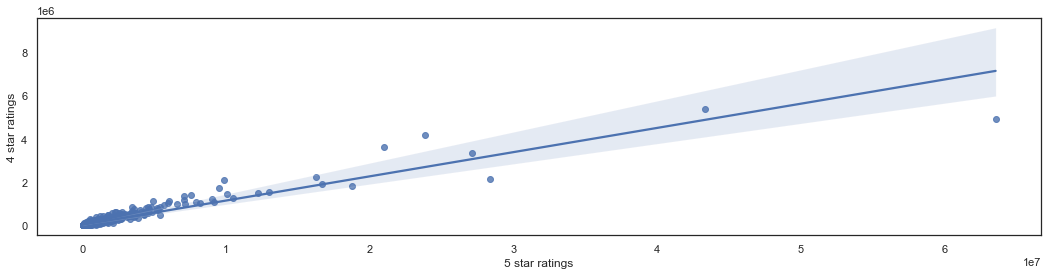

In [138]:
Figure2 = sns.regplot(x='5 star ratings', y='4 star ratings', data = df2)

Figure 2: The scatterplot displays the correlation between 5 star ratings and 4 star ratings from games in the Google Play Store. After viewing the data displayed on this image I can see that, similarly to the previous image, as the amount of 5 star ratings increase so do the 4 star ratings. This shows a postive correlation between 5 star ratings and four star ratings overall.

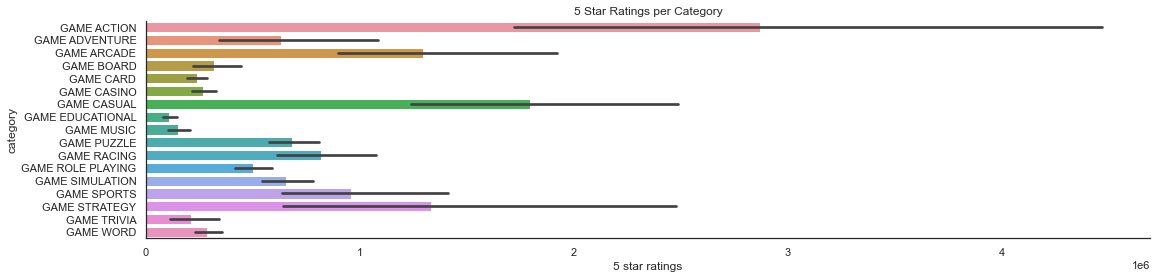

In [140]:
Figure3 = sns.barplot(data = df, x='5 star ratings', y='category')
Figure3.set(title='5 Star Ratings per Category')
sns.despine()

Figure 3: This barplot displays total 5 star ratings by category. From this plot we can see that action game have the most five star ratings by quite a large margin. This could indicate that action games are generally the most popular, however, further analysis will be required to determine if this is really the case.

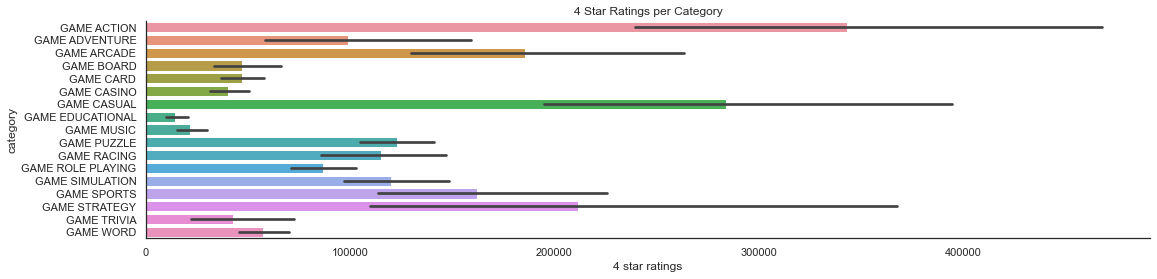

In [141]:
Figure4 = sns.barplot(data = df, x='4 star ratings', y='category')
Figure4.set(title='4 Star Ratings per Category')
sns.despine()

Figure 4: This barplot displays total 4 star ratings by category. After viewing this plot it seems that all categories appear to increase at simmlar rates to the total 5 star ratings. This suggests that total ratings may not determine the overall game quality as total ratings amoung categories as a whole increase unformly, reguardless of the # star rating. I will analyse one more graph to see if this trend continues.

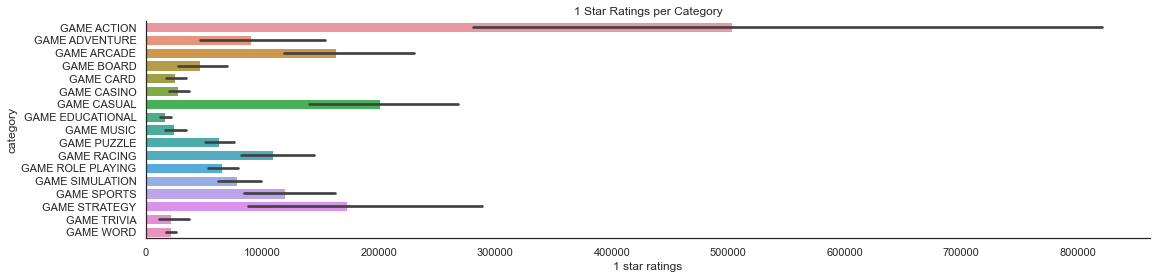

In [143]:
Figure5 = sns.barplot(data = df, x='1 star ratings', y='category')
Figure5.set(title='1 Star Ratings per Category')
sns.despine()

Figure 5: This barplot displays total 1 star ratings by category. The trends on this figure appear to be consitant with those on figure 3 and figure 4. Action games still have quite a large gap on the other categories. Additionally, the categories appear to be in allmost the same order in all three figures.

### Conclusion

After analysing my data and viewing various factors it becomes clear that game categories do not appear to have a substantial overall impact on game ratings in the google play store. Rather,] the individual game characteristics what what determine the ratings. Action games appear to have a slightly higher rating on average than its competitors so in all likelyhood action games would seem to have a slightly higher chance over being successful. However, the difference in average rating is so slim that my recomendation for making a successful game would be to focus on making a game that you believe will be of the highest quality, instead of focusing on the category the game will fit into.